In [1]:
from fastai.vision.all import *


First, we'll download a sample dataset. For image classification, the 'Pets' dataset is a good starting point provided by fastai.

In [2]:
path = untar_data(URLs.PETS)
path.ls()

<div><progress max="811706944" value="811712512"></progress> 100.00% [811712512/811706944 00:56&lt;00:00]</div>

[Path('/root/.fastai/data/oxford-iiit-pet/images'), Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

Now that we have the data, we need to tell fastai how to process it. We'll use a `DataBlock` to define the steps for creating our dataset and dataloaders. This includes specifying the data source, how to get the image files, how to extract the labels, and how to transform the images.

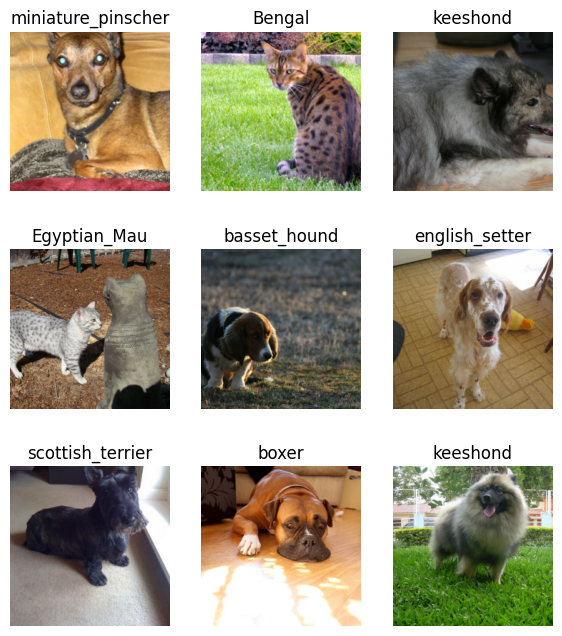

In [3]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(valid_pct=0.2, seed=42),
                   get_y=using_attr(RegexLabeller(r'(.*)_\d+.jpg$'), 'name'),
                   item_tfms=Resize(224))

dls = pets.dataloaders(path/"images")
dls.show_batch(max_n=9, figsize=(7,8))

Now, we can train a convolutional neural network (CNN) using the `fastai` library. We'll use a pre-trained `resnet34` model, which is a good starting point for many image classification tasks, and fine-tune it on our dataset.

In [4]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
# Remove the default ProgressCallback which causes the 'NBMasterBar' error
# This will disable the interactive progress bar but allow training to proceed.
learn.remove_cb(ProgressCallback)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:00<00:00, 113MB/s]


[0, 1.46213960647583, 0.33257749676704407, 0.10893099009990692, '00:42']
[0, 0.4404102861881256, 0.3129633665084839, 0.09675236791372299, '00:41']
[1, 0.32003989815711975, 0.2811403274536133, 0.09133964776992798, '00:42']
[2, 0.15725362300872803, 0.21677370369434357, 0.07036536186933517, '00:42']
[3, 0.08180443942546844, 0.20874916017055511, 0.06901217997074127, '00:42']


A confusion matrix helps us understand the performance of our classification model by showing the number of correct and incorrect predictions made for each class. Let's generate and display it for our trained model.

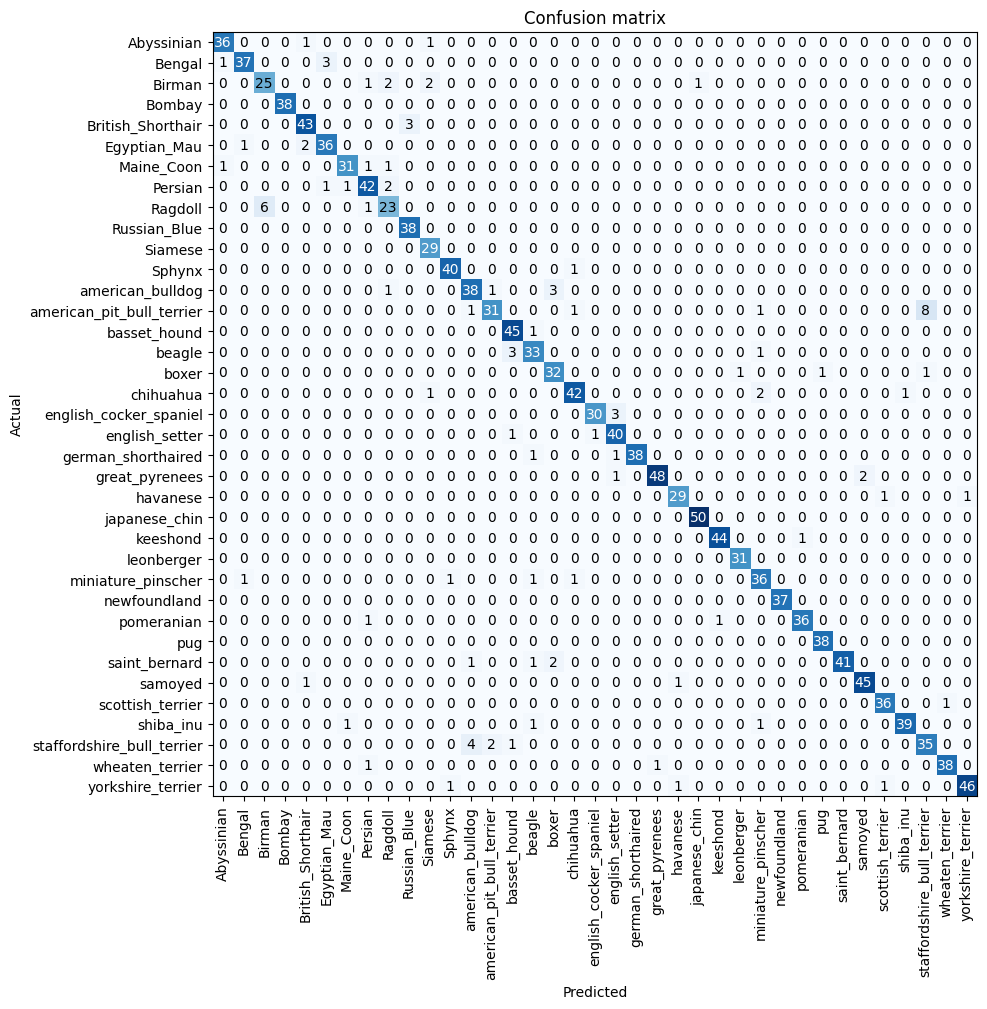

In [5]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10))

In [7]:
def classify_pet(img):
  pred,idx,probs=learn.predict(img)
  return f"prediction :{pred} (confidence:{probs[idx]:.2f})"


In [8]:
import gradio as gr
gr.Interface(
    fn=classify_pet,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Pet classification"

).launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3df2114d881c28bd0a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
